In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Администратор\\Documents\\M3023622\\ИльинаЖирков\\LR7\\games.csv")

In [3]:
df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, inplace=True)

In [4]:
df = df.drop([659, 14244])

In [5]:
df['year_of_release'].fillna(1979, inplace=True)

In [6]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [7]:
df['critic_score'].fillna(0, inplace=True)

In [8]:
df['user_score'].replace('tbd', 0, inplace=True)

In [9]:
df['user_score'].fillna(0, inplace=True)

In [10]:
df['user_score'] = df['user_score'].astype(float)

In [11]:
df['rating'].fillna('-', inplace=True)

In [12]:
df.insert(8, 'total_sales', df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'])

In [13]:
total_year = df.pivot_table(index=['year_of_release'], values='name', aggfunc='count').sort_values('name', ascending = False)
total_year = total_year.reset_index()
total_year = total_year.drop(20)

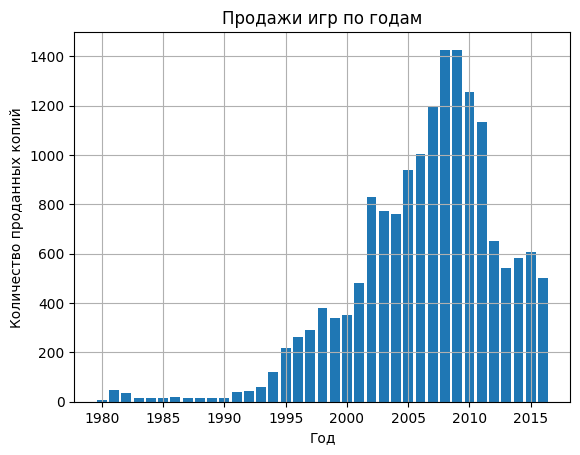

In [14]:
plt.grid()
plt.bar(total_year['year_of_release'], total_year['name'])
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий')
plt.show()

In [15]:
platform_sales = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values('platform')
platform_sales = platform_sales.reset_index()
platform_sales

,platform,total_sales
0,2600,96.98
1,3DO,0.10
2,3DS,259.00
3,DC,15.95
4,DS,806.12
5,GB,255.46
6,GBA,317.85
7,GC,198.93
8,GEN,28.35
9,GG,0.04


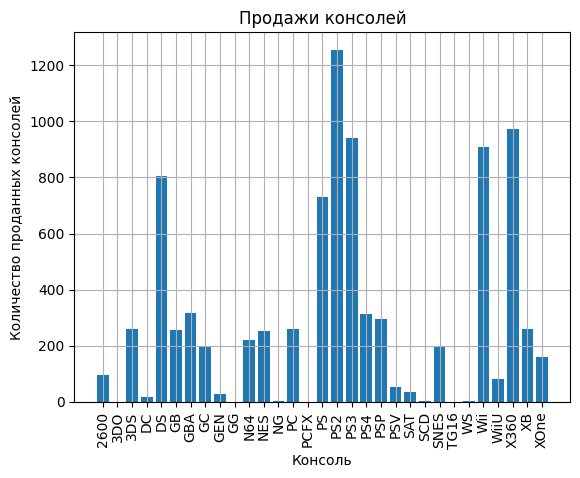

In [19]:
plt.grid()
plt.bar(platform_sales['platform'], platform_sales['total_sales'])
plt.xticks(rotation=90)
plt.title('Продажи консолей')
plt.xlabel('Консоль')
plt.ylabel('Количество проданных консолей')
plt.show()